In [12]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("joniarroba/noshowappointments")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'noshowappointments' dataset.
Path to dataset files: /kaggle/input/noshowappointments


In [13]:
import pandas as pd
df = pd.read_csv('KaggleV2-May-2016.csv')

In [6]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [14]:
# fix date columns
# convert to datetime then get the difference
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['WaitTime'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

# convert "no-show" to numbers: yes = 1; no = 0
df['No-show'] = df['No-show'].replace({'Yes': 1, 'No': 0})

# convert "gender" to numbers: male = 1; female = 0
df['Gender'] = df['Gender'].replace({'F': 0, 'M': 1})

# drop columns that don't help with prediction (IDs and exact dates)
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood'], axis=1, inplace=True)

# remove any rows with negative wait times (data errors)
df = df[df['WaitTime'] >= 0]

df


/tmp/ipython-input-1551367949.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['No-show'] = df['No-show'].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-1551367949.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'F': 0, 'M': 1})


,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitTime
5,0,76,0,1,0,0,0,0,0,1
6,0,23,0,0,0,0,0,0,1,1
7,0,39,0,0,0,0,0,0,1,1
9,0,19,0,0,0,0,0,0,0,1
10,0,30,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
110522,0,56,0,0,0,0,0,1,0,34
110523,0,51,0,0,0,0,0,1,0,34
110524,0,21,0,0,0,0,0,1,0,40
110525,0,38,0,0,0,0,0,1,0,40


In [15]:
df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitTime
5,0,76,0,1,0,0,0,0,0,1
6,0,23,0,0,0,0,0,0,1,1
7,0,39,0,0,0,0,0,0,1,1
9,0,19,0,0,0,0,0,0,0,1
10,0,30,0,0,0,0,0,0,0,1


In [16]:
df.isna().sum()

,0
Gender,0
Age,0
Scholarship,0
Hipertension,0
Diabetes,0
Alcoholism,0
Handcap,0
SMS_received,0
No-show,0
WaitTime,0


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# define the features (X) and target (y)
X = df.drop('No-show', axis=1)
y = df['No-show']

# split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize and train
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# evaluate
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.70      0.72     10301
           1       0.33      0.36      0.34      4091

    accuracy                           0.61     14392
   macro avg       0.53      0.53      0.53     14392
weighted avg       0.62      0.61      0.61     14392



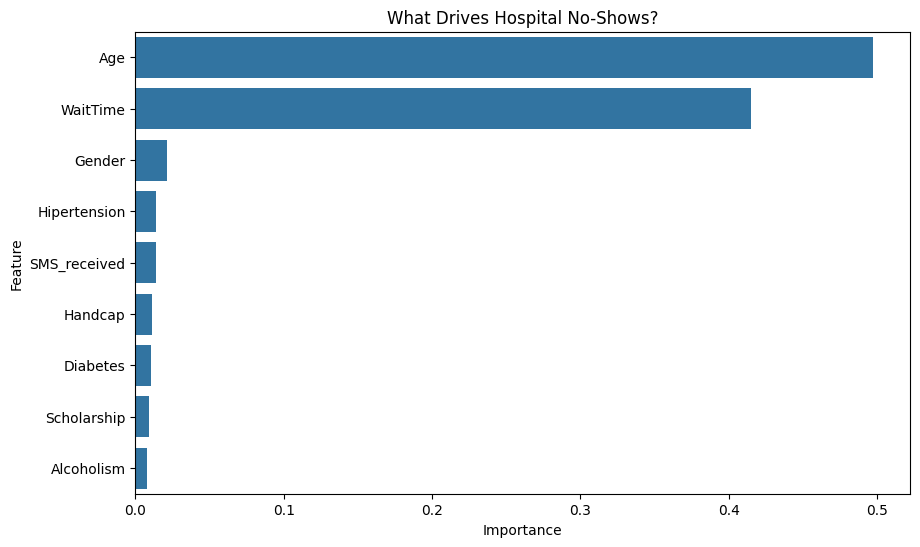

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# feature importance
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names,
                                      'Importance': importances}).sort_values(by='Importance', ascending=False)

# plotting
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Importance', y = 'Feature', data = feature_importance_df)
plt.title('What Drives Hospital No-Shows?')
plt.show()